## 1.Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [6]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score

## 2.Loading the Dataset

In [7]:
df_star=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/galaxy/star_classification.csv')

In [8]:
df_star.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## 3.Exploratory Data Analysis

In [9]:
df_star.shape

(100000, 18)

In [10]:
df_star['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [11]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [12]:
df_star.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [13]:
#There are outliers present in some columns.We need to treat the outliers.

In [14]:
num_features=df_star.select_dtypes(include=np.number)
num_features.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')

In [15]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    UL=data[variable].quantile(.75)+(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    return LL,UL

In [16]:
cols=['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID']

In [17]:
for col in cols:
    LL,UL=boundaries(df_star,col)
    
    df_star[col]=np.where(df_star[col]<LL,LL,
                         np.where(df_star[col]>UL,UL,df_star[col]))

In [18]:
df_star.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,22.080882,20.631959,19.646463,19.085571,18.770243,4481.366060,301.0,3.511610,178.171855,5.783882e+18,0.508544,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,2.249611,2.034380,1.850307,1.750812,1.757609,1964.764593,0.0,1.586912,124.742278,3.324016e+18,0.521890,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,15.349721,14.227424,13.772391,13.735970,13.770014,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,28.690071,26.861574,25.408221,24.392810,23.611784,8162.000000,301.0,6.000000,479.500000,1.412694e+19,1.678611,12547.000000,58932.000000,1000.000000


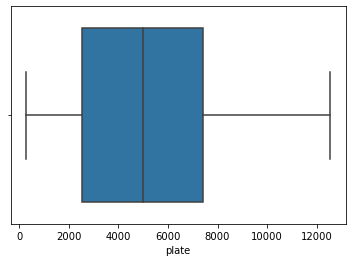

In [19]:
sns.boxplot(x='plate',data=df_star)
plt.show()

The outliers have been treated now.

In [20]:
#We will drop the obj_ID since we don't require it for our model building.

In [21]:
df_star=df_star.drop('obj_ID',axis=1)

In [22]:
#Label Encoding the target variable

In [23]:
le=LabelEncoder()

In [24]:
df_star['class']=le.fit_transform(df_star['class'])

In [25]:
df_star['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [26]:
#Correlation matrix

In [27]:
vcorr=df_star.corr()

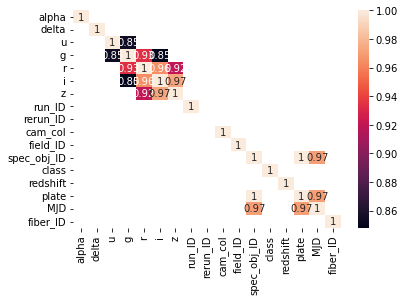

In [28]:
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

Since we have columns with high correlation, we will use PCA for dimensionality reduction.

In [29]:
df_star1=df_star.copy(deep=True)

In [30]:
#Separating the dependent and independent variables

In [31]:
X=df_star1.drop('class',axis=1)
y=df_star1['class']

In [32]:
#scaling the data

In [33]:
sc=StandardScaler()

In [34]:
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,-0.434604,0.425529,0.799226,0.807789,0.404555,0.045784,0.013352,-0.445535,0.0,-0.952553,-0.795018,0.228609,0.241909,0.228633,0.423203,-1.021342
1,-0.339921,0.363402,1.198751,1.081377,1.587840,1.189482,1.618131,0.018646,0.0,0.937920,-0.474355,1.797912,0.518487,1.797924,1.420729,-0.081883
2,-0.367251,0.582713,1.414558,0.998801,0.520617,0.150216,0.101290,-0.445535,0.0,-0.952553,-0.466339,-0.190037,0.259922,-0.190025,0.001854,-0.551612
3,1.669523,-1.249105,0.024866,1.545737,1.062076,0.810467,0.273018,-0.147278,0.0,-0.322395,0.287219,1.358962,0.812055,1.358942,1.354927,1.195196
4,1.737310,-0.150242,-1.175188,-1.500061,-1.701885,-1.775448,-1.835248,1.842792,0.0,-0.322395,-0.330057,0.333328,-0.751928,0.333297,0.330860,1.441070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430113,-1.360650,0.038544,1.152151,1.220116,1.267937,1.118256,1.677886,0.0,-0.952553,2.415618,1.435146,-0.974434,1.435155,1.194571,-0.041515
99996,-1.535053,-0.220744,0.271292,0.862341,0.434291,0.383835,0.366987,1.748632,0.0,-1.582710,0.888461,0.843101,-0.198605,0.843071,0.743915,1.529144
99997,0.486606,-0.429360,-0.405282,-0.669490,-0.779433,-0.796909,-0.806801,0.423785,0.0,0.307763,1.040776,-0.803813,-0.699727,-0.803786,-0.582617,-1.377309
99998,0.358952,1.146631,1.453374,0.494311,0.144515,-0.007443,-0.082739,-0.423140,0.0,0.307763,-0.378156,0.546690,-0.102522,0.546691,0.430945,0.075917


In [35]:
pca=PCA()

In [36]:
pca_star=pca.fit_transform(df_X_scaled)

In [37]:
pca_star

array([[-8.69580998e-01, -1.80345443e-01, -5.69476653e-01, ...,
        -6.90123396e-02, -1.63633336e-14,  4.09925297e-18],
       [-4.09689042e+00, -5.75103669e-01, -7.62834769e-02, ...,
        -3.68772767e-01,  2.23123670e-14, -2.08961661e-17],
       [-8.43929314e-01,  2.13183913e-01, -1.31087245e+00, ...,
        -5.83119142e-02, -1.94871443e-13, -1.91507270e-17],
       ...,
       [ 2.24596030e+00,  8.05276273e-01,  2.76929362e-01, ...,
         8.39050049e-03,  1.16409817e-13,  1.41423662e-19],
       [-1.05994774e+00, -1.06390616e+00, -7.53081229e-01, ...,
         1.58102586e-02, -2.26333473e-14, -2.16683692e-19],
       [-1.72834046e+00, -1.75900416e+00, -3.04334186e-01, ...,
         8.27217058e-02,  1.03005984e-14, -1.65522441e-19]])

In [38]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.43410962 0.53198128 0.61856484 0.69061171 0.76083909 0.81809367
 0.87372893 0.9261388  0.96381393 0.98914851 0.99524144 0.99771215
 0.99914776 1.         1.         1.        ]


With 9 features, we can capture 96% of the variance.

In [39]:
df_pca_star=pd.DataFrame(pca_star[:,:9])

In [40]:
df_pca_star

,0,1,2,3,4,5,6,7,8
0,-0.869581,-0.180345,-0.569477,1.470739,0.470233,-0.545879,-0.721875,-0.323445,0.048740
1,-4.096890,-0.575104,-0.076283,-0.192978,-0.393599,-0.921953,-0.162364,-0.805483,0.309995
2,-0.843929,0.213184,-1.310872,1.163570,0.449420,-0.008141,-0.815740,-0.203242,-0.351335
3,-2.979425,-0.240121,0.633447,-0.632106,0.748343,1.244618,0.793060,0.515932,1.529764
4,2.248068,-1.327334,2.969101,-1.566454,1.547393,1.405724,-0.220505,0.067002,-0.167643
...,...,...,...,...,...,...,...,...,...
99995,-2.941604,2.758377,1.954660,0.571824,-0.767099,0.890616,-0.396287,-1.193240,0.337265
99996,-1.895048,1.460242,1.702036,0.171562,-0.324622,1.227818,-1.747637,0.384857,-0.810203
99997,2.245960,0.805276,0.276929,0.134179,0.257379,0.042632,1.050267,-1.141111,-0.087683
99998,-1.059948,-1.063906,-0.753081,-0.110435,0.126380,0.245222,-0.609195,-0.978360,-0.155204


In [41]:
#correlation matrix

In [42]:
vcorr1=df_pca_star.corr()

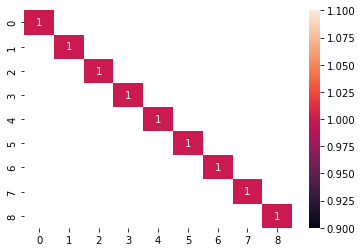

In [43]:
sns.heatmap(vcorr1[(vcorr1>0.80) | (vcorr1<-0.80)],annot=True)
plt.show()

Now we can find that there is no strong correlation between the features.

## 4.Spliiting into train and test data

In [44]:
X_train,X_test,y_train,y_test=train_test_split(df_pca_star,y,test_size=0.25,random_state=1)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75000, 9), (25000, 9), (75000,), (25000,))

## 5.Model Building using ML

In [46]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),GaussianNB()]

In [47]:
for i in range(5):
    models[i].fit(X_train,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test)
    print('Accuracy score: ')
    print(accuracy_score(y_test,y_pred))
    \
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    \
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

LogisticRegression(): 
Accuracy score: 
0.78412
Confusion Matrix: 
[[13784   244   809]
 [  548  4243     5]
 [ 3790     1  1576]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     14837
           1       0.95      0.88      0.91      4796
           2       0.66      0.29      0.41      5367

    accuracy                           0.78     25000
   macro avg       0.79      0.70      0.72     25000
weighted avg       0.77      0.78      0.76     25000


DecisionTreeClassifier(): 
Accuracy score: 
0.81588
Confusion Matrix: 
[[12640   563  1634]
 [  537  4160    99]
 [ 1676    94  3597]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14837
           1       0.86      0.87      0.87      4796
           2       0.67      0.67      0.67      5367

    accuracy                           0.82     25000
   macro avg       0.80      0.8

We can find that the accuracy score with RandomForestClassifier model is the highest(89%).We will try building the model using Neural Network.

## 6.Neural Network

In [48]:
classifier=Sequential()

In [49]:
X.shape,y.shape

((100000, 16), (100000,))

In [50]:
X_train.shape

(75000, 9)

Since we have three categories labelled as 0,1,2 we need to convert it into 0,1 for our model to interpret properly.So,we will use function(to_categorical) for this purpose.

In [51]:
y_train_dummy=to_categorical(y_train)

In [52]:
y_test_dummy=to_categorical(y_test)

In [53]:
y_train_dummy.shape

(75000, 3)

In [54]:
#Adding Input layer and hidden layers
classifier.add(Dense(9,kernel_initializer='uniform',activation='relu',input_dim=9))
classifier.add(Dense(9,kernel_initializer='uniform',activation='relu'))

In [55]:
#Adding output layer
classifier.add(Dense(3,kernel_initializer='uniform',activation='softmax'))

In [56]:
#Compiling
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
#Printing the summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 3)                 30        
                                                                 
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________


In [58]:
#fitting the model
classifier.fit(X_train,y_train_dummy,batch_size=12,epochs=50)

Epoch 1/50
6250/6250 [==============================] - 17s 3ms/step - loss: 0.5196 - accuracy: 0.7679
Epoch 2/50
6250/6250 [==============================] - 19s 3ms/step - loss: 0.4689 - accuracy: 0.8041
Epoch 3/50
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4422 - accuracy: 0.8261
Epoch 4/50
6250/6250 [==============================] - 19s 3ms/step - loss: 0.4238 - accuracy: 0.8361
Epoch 5/50
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4135 - accuracy: 0.8424
Epoch 6/50
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4075 - accuracy: 0.8441
Epoch 7/50
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4048 - accuracy: 0.8448
Epoch 8/50
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4021 - accuracy: 0.8463
Epoch 9/50
6250/6250 [==============================] - 16s 3ms/step - loss: 0.3987 - accuracy: 0.8485
Epoch 10/50
6250/6250 [==============================] - 17s 3ms/step - l

In [59]:
y_pred=classifier.predict(X_test)

782/782 [==============================] - 2s 2ms/step


Since our target column has 0,1 and the y_pred has decimal values, this can't be compared.So we will use np.round to get the decimal values as 0 and 1.

In [60]:
y_pred=np.round(y_pred)

In [61]:
print(classification_report(y_test_dummy,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     14837
           1       0.95      0.91      0.93      4796
           2       0.86      0.60      0.71      5367

   micro avg       0.87      0.87      0.87     25000
   macro avg       0.89      0.82      0.85     25000
weighted avg       0.87      0.87      0.86     25000
 samples avg       0.87      0.87      0.87     25000



In [62]:
print(accuracy_score(y_test_dummy,y_pred))

0.86796


The model accuracy is 87% using Nueral Network.